In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# clone darknet repo
#!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14924, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 14924 (delta 21), reused 34 (delta 20), pack-reused 14880
Receiving objects: 100% (14924/14924), 13.37 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (10139/10139), done.


In [2]:
!pwd

/content


In [3]:
%cd ./drive/MyDrive/YOLO_Stain_Tilda/darknet
!ls

/content/drive/MyDrive/YOLO_Stain_Tilda/darknet
3rdparty		DarknetConfig.cmake.in	net_cam_v3.sh
backup			darknet_images.py	net_cam_v4.sh
bad.list		darknet.py		obj
build			darknet_video.py	predictions.jpg
build.ps1		data			README.md
cfg			generate_train.py	results
chart.png		image_yolov3.sh		scripts
chart_stain_custom.png	image_yolov4.sh		src
cmake			include			vcpkg.json
CMakeLists.txt		json_mjpeg_streams.sh	video_yolov3.sh
darknet			LICENSE			video_yolov4.sh
darknet53.conv.74	Makefile


In [4]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [5]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:
#!ls
#!python generate_train.py

3rdparty	DarknetConfig.cmake.in	include		       results
backup		darknet_images.py	json_mjpeg_streams.sh  scripts
build		darknet.py		LICENSE		       src
build.ps1	darknet_video.py	Makefile	       vcpkg.json
cfg		data			net_cam_v3.sh	       video_yolov3.sh
cmake		generate_train.py	net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	image_yolov3.sh		obj
darknet		image_yolov4.sh		README.md


In [ ]:
#darknet에 convolution layer 다운
#!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-04-16 09:22:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  22.9MB/s    in 7.5s    

2021-04-16 09:22:15 (20.6 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
#처음에 학습시킬때 
#!./darknet detector train data/obj.data cfg/stain_custom.cfg darknet53.conv.74 -dont_show -map

In [9]:
# 이후 사용될 여러 기능 구현
def imShow(path): # 결과 사진 출력 함수
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload(): # 사용자 설정 파일 업로드 함수
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

def download(path): # 파일 다운로드 함수
  from google.colab import files
  files.download(path)

# MODEL 5 
- model - yolov3-spp
- dataset - dataset2 (Stain + Defect_free)
- split - train, test, validation
- preprocessing - no
- model5

In [ ]:
##학습된 가중치로 학습할 때 
!./darknet detector train data/obj.data cfg/stain_custom.cfg backup/stain_custom_best.weights -dont_show -map

In [13]:
#사진 탐지
!./darknet detector test data/obj.data cfg/stain_custom.cfg backup/stain_custom_best.weights -ext_output data/test/test4.jpg -thresh 0.5 -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.604 BF
   8 Shortcut Layer: 5, 

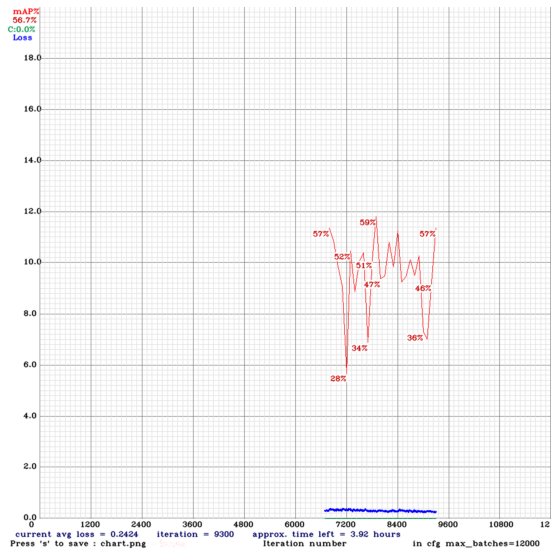

In [12]:
imShow('chart.png')

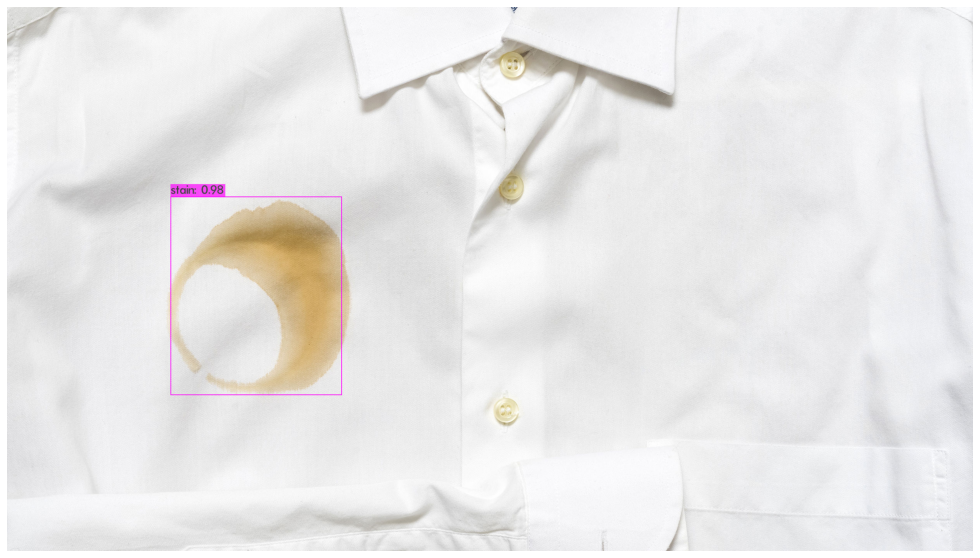

In [14]:
# 미리 설정한 결과 출력 함수로 결과 출력
imShow('predictions.jpg')

# VALIDATION SET RESULTS 
 
 calculation mAP (mean average precision)...
36
 detections_count = 45, unique_truth_count = 20  
class_id = 0, name = stain, ap = 89.50%   	 (TP = 19, FP = 1) 

 for conf_thresh = 0.25, precision = 0.95, recall = 0.95, F1-score = 0.95  

 for conf_thresh = 0.25, TP = 19, FP = 1, FN = 1, average IoU = 69.58 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.895000, or 89.50 % 
 
Total Detection Time: 12 Seconds


# TEST SET RESULTS

 calculation mAP (mean average precision)...
36
 detections_count = 50, unique_truth_count = 19  
class_id = 0, name = stain, ap = 60.20%   	 (TP = 12, FP = 2) 

 for conf_thresh = 0.25, precision = 0.86, recall = 0.63, F1-score = 0.73 

 for conf_thresh = 0.25, TP = 12, FP = 2, FN = 7, average IoU = 64.46 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.601951, or 60.20 % 

Total Detection Time: 13 Seconds